<a href="https://colab.research.google.com/github/shadab4150/Deep-Learning-Classifiers/blob/master/104_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>104 flower Image Classification</h1></center>
<center><img src='https://hgtvhome.sndimg.com/content/dam/images/hgtv/fullset/2015/11/10/0/CI_Costa-Farms-Ballad-aster.jpg.rend.hgtvcom.966.644.suffix/1447169929799.jpeg' width=300 height=200>
<img src='https://www.top13.net/wp-content/uploads/2014/11/28-small-flowers-1024x682.jpg' width=300 height=200>
<img src='https://www.top13.net/wp-content/uploads/2014/11/17-small-flowers.jpg' width=300 height=200></center>










In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!cp '/content/drive/My Drive/Dataset/flowers_google.zip' '/content/'
!cp '/content/drive/My Drive/Dataset/test_flower.zip' '/content/'

In [0]:
!unzip '/content/flowers_google.zip' -d '/content/flower/train/'

In [0]:
!unzip '/content/test_flower.zip' -d '/content/flower/test/'

In [0]:
from fastai.vision import *
from fastai import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/flowers_idx.csv')
label = pd.read_csv('/content/flowers_label.csv')

In [14]:
df.head()

,id,flower_cls
0,7486,cape flower
1,9454,cape flower
2,6974,cape flower
3,4739,cape flower
4,8783,cape flower


In [12]:
label.head()

,label,flower_class
0,0,pink primrose
1,1,hard-leaved pocket orchid
2,2,canterbury bells
3,3,sweet pea
4,4,wild geranium


In [0]:
path = Path('/content/flower/train/')
path1 = Path('/content/flower/test/')

# forming DataBunch with test and train

In [0]:
tfms = get_transforms(do_flip=True,max_rotate=0.1,max_lighting=0.15)

In [0]:
test = (ImageList.from_folder(path1,extensions='.jpeg'))

In [0]:
data = (ImageList.from_df(df,path,folder='flowers_google',suffix='.jpeg',cols='id')
                .split_by_rand_pct(0.15)
                .label_from_df(cols='flower_cls')
                .transform(tfms)
                .add_test(test)
                .databunch(bs=128)
                .normalize(imagenet_stats))


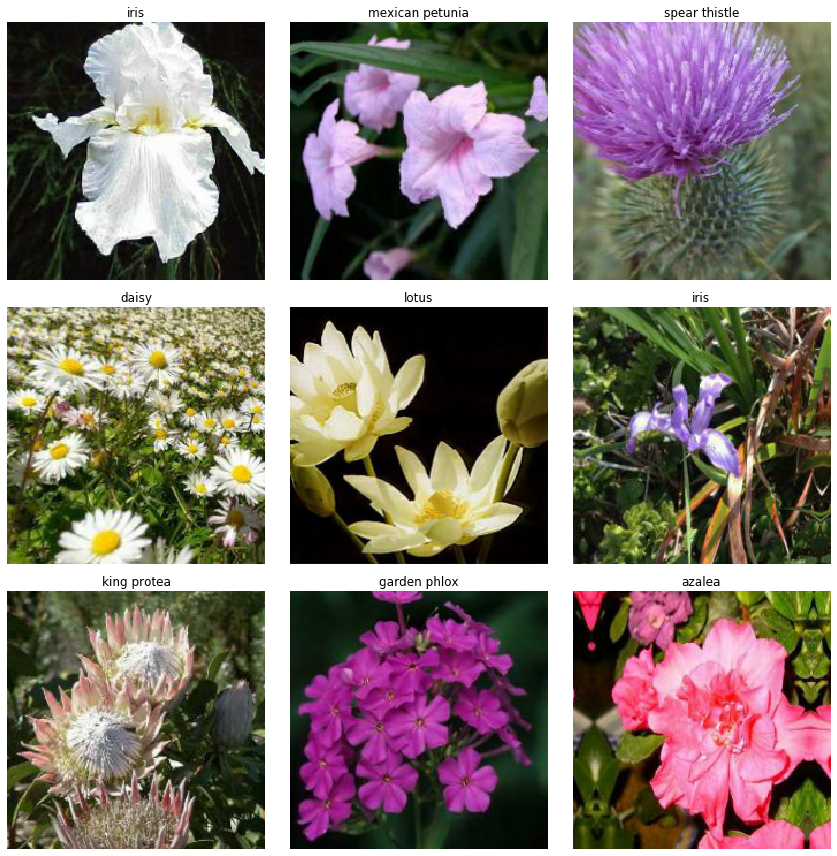

In [26]:
data.show_batch(rows=3)

### Total classes, length of train, validation and test set

In [36]:
len(data.classes),len(data.train_ds),len(data.valid_ds),len(data.test_ds)

(104, 13996, 2469, 7382)

# Using a pretrained ResNet50 model

## with metrics = f1_score 
>average = macro 


* because there is class imbalance in the data set

In [0]:
fb = FBeta()
fb.average='macro'

In [39]:
learn = cnn_learner(data,models.resnet50,metrics=[accuracy,fb]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


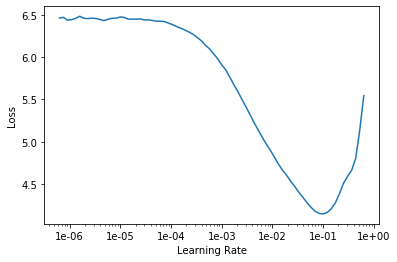

In [40]:
learn.lr_find()
learn.recorder.plot()

In [42]:
gc.collect()

7286

In [0]:
lr = 1e-2

In [43]:
learn.fit_one_cycle(10,lr,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.733854,0.939811,0.759012,0.720295,01:44
1,1.153993,1.420853,0.676387,0.595894,01:41
2,1.138062,1.278481,0.701904,0.628009,01:40
3,0.892396,1.067045,0.737141,0.702936,01:39
4,0.725074,0.950229,0.760632,0.740352,01:39
5,0.564668,0.753347,0.809640,0.785900,01:38
6,0.434394,0.496903,0.875658,0.865769,01:38
7,0.295898,0.418402,0.895099,0.889186,01:37
8,0.191464,0.384876,0.906440,0.903880,01:37
9,0.153314,0.384284,0.909275,0.909659,01:37


In [0]:
learn.save('model1')
learn.load('model1')
learn.unfreeze()

In [0]:
#learn.export()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


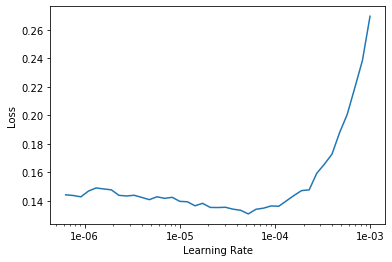

In [65]:
learn.lr_find()
learn.recorder.plot()

In [68]:
gc.collect()

5965

In [69]:
learn.fit_one_cycle(3,1e-5,wd=0.2)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.147254,0.378988,0.912920,0.911895,01:46
1,0.135803,0.372026,0.912110,0.912383,01:48
2,0.119626,0.371653,0.912110,0.912316,01:49


In [0]:
learn.save('model2')
learn.load('model2')
learn.unfreeze()

In [0]:
#learn.to_fp32().export('/content/flower91.pkl')

In [0]:
learn.to_fp32().export()

In [0]:
#!cp '/content/flower91.pkl' '/content/drive/My Drive/Dataset'

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


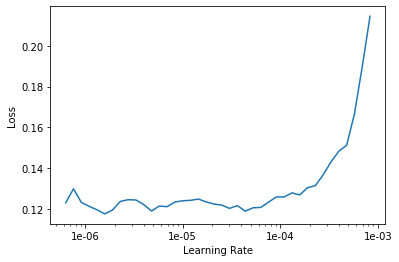

In [72]:
learn.lr_find()
learn.recorder.plot()

In [79]:
gc.collect()

0

In [83]:
learn.freeze_to(-2)
learn.fit_one_cycle(2,1e-6,wd=0.3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.276241,0.409569,0.896719,0.886403,01:42
1,0.277178,0.409115,0.896314,0.880471,01:41


# Final Fbeta 0.91

In [0]:
learn32 = load_learner(path)

californian poppy


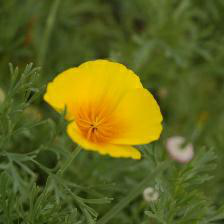

In [91]:
img = open_image('/content/flower/test/d9cb87ad0.jpeg')
print(learn32.predict(img)[0])
img

In [0]:
#!cp '/content/flower.pkl' '/content/drive/My Drive/Dataset/'

In [92]:
interp = ClassificationInterpretation.from_learner(learn)

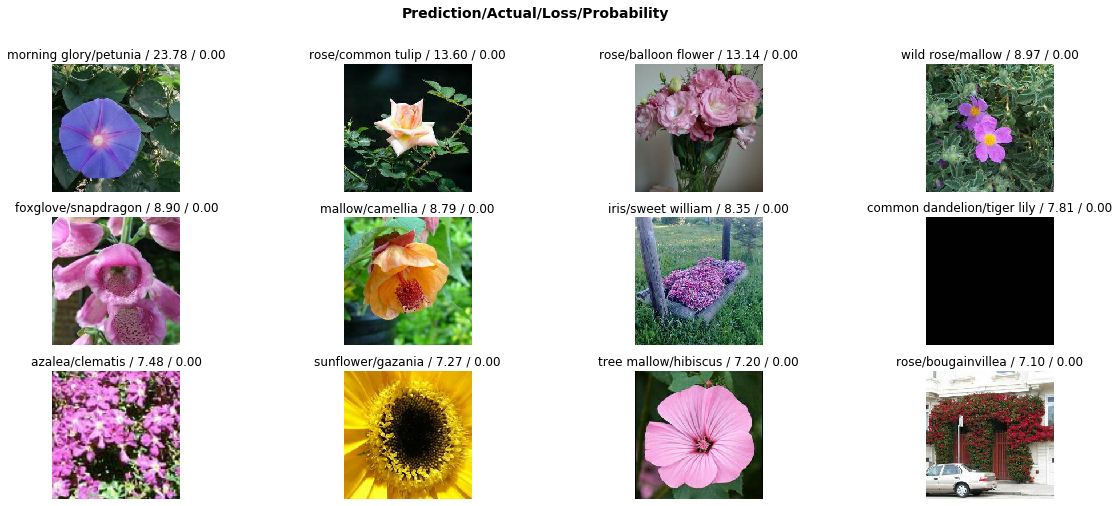

In [93]:
interp.plot_top_losses(12,figsize=(20,8))

In [96]:
interp.most_confused(min_val=3)

[('common tulip', 'rose', 7),
 ('camellia', 'rose', 5),
 ('sunflower', 'common dandelion', 4),
 ('magnolia', 'lotus', 3),
 ('morning glory', 'iris', 3),
 ('rose', 'common tulip', 3)]

In [98]:
pred,output=learn.get_preds(DatasetType.Test)

In [0]:
out=[np.argmax(x) for x in pred]

In [0]:
path2 = '/content/flower/test/'

In [0]:
sampel = pd.read_csv('/content/sample_submission.csv')

In [161]:
sampel.head(20)

,id,label
0,b48c962e0,corn poppy
1,a13d3dfa4,petunia
2,94269c190,rose
3,bcb18c6e4,wild rose
4,d15a4d94c,common dandelion
5,914b0e71b,sweet william
6,065c9b5be,pink-yellow dahlia
7,dd8b1aaca,watercress
8,8c39d1b41,cosmos
9,e2fdce920,wild geranium


In [0]:
idcode=sampel.id.values

In [0]:
from tqdm import tnrange,tqdm

In [162]:
for i in tnrange(len(idcode),desc='image'):
  idc = sampel.iloc[i][0]
  k = path2+idc+'.jpeg'
  k = open_image(k)
  ans = learn.predict(k)[0]
  sampel.loc[[i],1:] = str(ans)
  

In [164]:
label.head()

,label,flower_class
0,0,pink primrose
1,1,hard-leaved pocket orchid
2,2,canterbury bells
3,3,sweet pea
4,4,wild geranium


# Replace flower label with ids

In [0]:
lab = {}
for i in range(label.shape[0]):
  sha = label.iloc[i]
  lab[sha[1]]=int(sha[0])

In [0]:
sampel.label.replace(lab,inplace=True)

In [175]:
sampel.head(10)

,id,label
0,b48c962e0,25
1,a13d3dfa4,50
2,94269c190,73
3,bcb18c6e4,103
4,d15a4d94c,49
5,914b0e71b,29
6,065c9b5be,59
7,dd8b1aaca,88
8,8c39d1b41,33
9,e2fdce920,4
